In [11]:
from prophet import Prophet

import pandas as pd

In [12]:
df = pd.read_csv("records/sample2.csv", parse_dates=["Date"]).rename(
    columns={"Date": "ds", "Sold": "y", "Sale": "sale"}
)

14:45:29 - cmdstanpy - INFO - Chain [1] start processing
14:45:29 - cmdstanpy - INFO - Chain [1] done processing


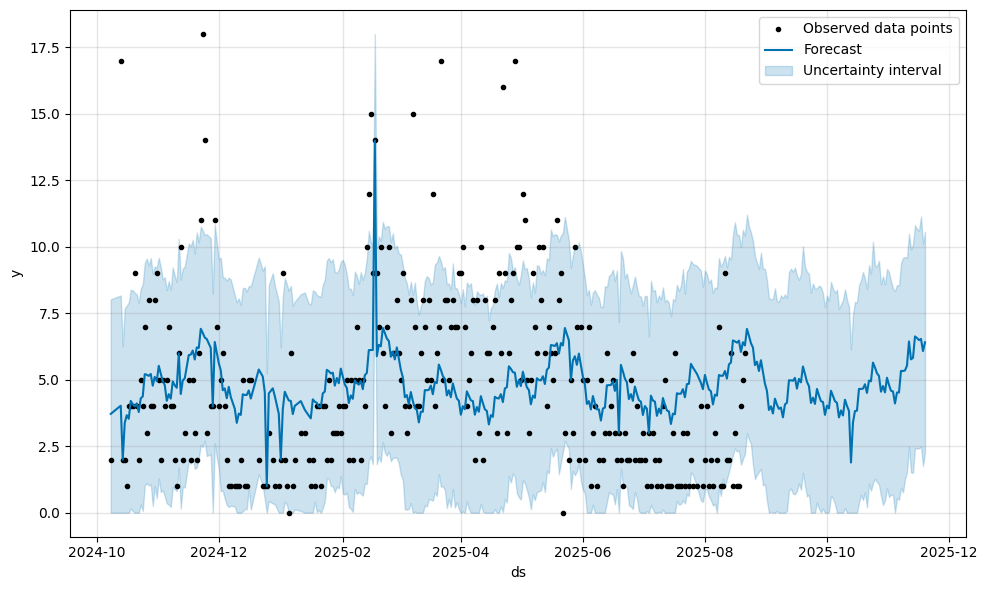

In [18]:
periods = 90

m = Prophet(growth="flat", scaling="minmax")
m.add_seasonality(name='quarter', period=90, fourier_order=5, mode='additive')
# m.add_seasonality(
#     name="quarterly",
#     period=91.25,  # ~ 365/4
#     fourier_order=4,  # can tune (3–9). 7 is a good start.
#     prior_scale=10.0,  # allow decent wiggle for the 3-month pattern
# )
m.add_country_holidays(country_name="US")
m.fit(df)

future = m.make_future_dataframe(periods=periods, freq="D", include_history=True)
forecast = m.predict(future)

for col in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast[col] = forecast[col].clip(lower=0.0)
    
fig1 = m.plot(forecast, include_legend=True)

<Axes: title={'center': 'Forecast vs Actuals'}, xlabel='ds'>

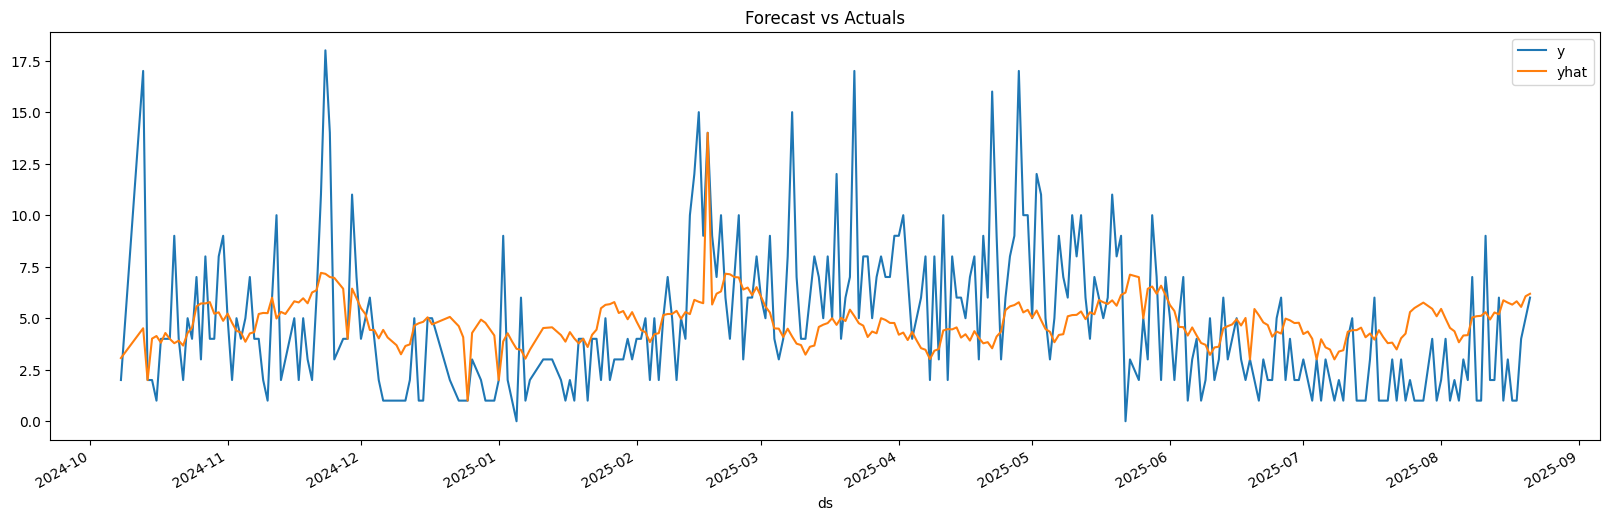

In [10]:
df_combined = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')
df_combined.plot(x='ds', y=['y', 'yhat'], figsize=(20, 6), title='Forecast vs Actuals')

In [9]:
accuracy = 100 - (abs(df_combined['y'] - df_combined['yhat']).sum() / df_combined['y'].sum() * 100)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 49.02%
